In [1]:
!#conda install -y -q -c fastai -c pytorch -c anaconda fastai anaconda
from fastai.vision.all import *
import torch
torch.cuda.is_available()

True

In [2]:
dblock = DataBlock(blocks=(ImageBlock,),
                   get_items=get_image_files,
                   #splitter=RandomSplitter(),
                   item_tfms=RandomResizedCrop(256),
                   #batch_tfms=aug_transforms(pad_mode="zeros", mult=2, min_scale=0.5, size=224)
                  )
dls = dblock.dataloaders("training", bs=8)

Setting-up type transforms pipelines
Found 12 items
2 datasets of sizes 10,2
Setting up Pipeline: PILBase.create

Building one sample
  Pipeline: PILBase.create
    starting from
      training/SAAM-1930.12.8_1.png
    applying PILBase.create gives
      PILImage mode=RGB size=1920x1471

Final sample: (PILImage mode=RGB size=1920x1471,)


Found 12 items
2 datasets of sizes 10,2
Setting up Pipeline: PILBase.create
Setting up after_item: Pipeline: RandomResizedCrop -- {'size': (256, 256), 'min_scale': 0.08, 'ratio': (0.75, 1.3333333333333333), 'resamples': (2, 0), 'val_xtra': 0.14, 'p': 1.0} -> ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: IntToFloatTensor -- {'div': 255.0, 'div_mask': 1} -> Flip -- {'size': None, 'mode': 'bilinear', 'pad_mode': 'zeros', 'mode_mask': 'nearest', 'align_corners': True, 'p': 0.5} -> RandomResizedCropGPU -- {'size': (224, 224), 'min_scale': 0.5, 'ratio': (1, 1), 'mode': 'bilinear', 'valid_scale': 1.0, 'p': 1.0} -> Brightness 

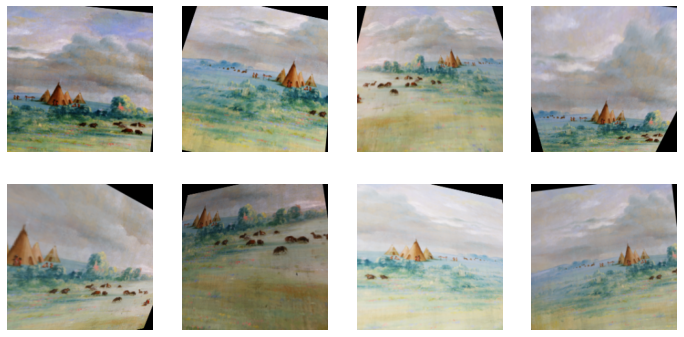

In [3]:
dblock.summary('training', bs=8, show_batch=True, unique=True)

In [6]:
learn = cnn_learner(dls, resnet34, metrics=error_rate, loss_func=CrossEntropyLossFlat(), n_out=1)
learn.lr_find()

ModuleAttributeError: 'Sequential' object has no attribute 'smooth_loss'

In [ ]:
learn.fine_tune(1)